<a href="https://colab.research.google.com/github/DonRoboto/RandomNumbers/blob/master/CONTINUOUS_RANDOM_VARIATES/Logit_Normal_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
def F(x):
  if 0<x and x<1:
    denominador = np.sqrt(2 * np.pi) * (1 - x) * x
    lg = (np.log(x/(1 - x)))**2
    numerador = np.exp(-0.5 * lg)
    r = numerador / denominador
  else:
    r = 0
  return r  

In [0]:
def T(x):
  if 0<x and x<1:
    r = x + 2
  else:
    r = 0
  return r  

In [0]:
def Logit(p):
  return np.log(p /(1-p))

In [0]:
def LogitNormal(x, mu, sigma):
  elemento1 = 1 / (sigma * np.sqrt(2 * np.pi)) 
  elemento2 = 1 / (x * (1 - x))
  elemento3 = ((Logit(x) - mu)**2) / (2 * (sigma**2))
  elemento4 = np.exp(-elemento3)
  return elemento1 * elemento2 * elemento4

In [0]:
x = np.linspace(0, 1, 10000)
y = [0] * len(x)

In [7]:
mu = 0
sigma = 1

for i in range(len(x)):
  y[i] = LogitNormal(x[i], mu, sigma)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [0]:
num_simulaciones = 400000
data = []

for k in range(num_simulaciones):
    Y = np.sqrt((5 * np.random.uniform(0,1))+4) - 2
    U = np.random.uniform(0,1)

   
    while U > (F(Y)/T(Y)):    
      Y = np.sqrt((5 * np.random.uniform(0,1))+4) - 2
      U = np.random.uniform(0,1)
    
    data.append(Y)

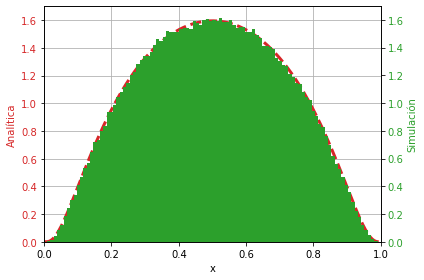

In [15]:
fig, ax1 = plt.subplots()
plt.grid(True)
plt.ylim(top=1.7)
plt.ylim(bottom=0)


color = 'tab:red'
ax1.set_xlabel('x')
ax1.set_ylabel('Analítica', color=color)
ax1.plot(x, y, 'r--', color=color, linewidth=3.0)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 1)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('Simulación', color=color)  
ax2.hist(data,bins=100, color=color, density=True)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()